# 1-1. Simple Linear Regression and Gradient Descent

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

### 1. Loading the Data

Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file Data/restaurant_franchise.txt contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

We load the data as follows:

In [2]:
data = np.loadtxt(os.path.join('Data', 'restaurant_franchise.txt'), delimiter=',')

x, y = data[:, 0], data[:, 1]
m = y.size  

### 2. Plot of the Data

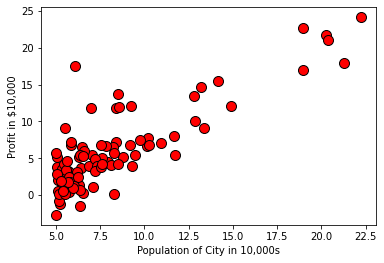

In [3]:
plt.plot(x, y, 'ro', ms=10, mec='k') # ro: red circle, ms: markersize, mec: marker edge color, k: black
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')  
plt.show()

### 3. Modification of x (add a column of 1's for the intercept term)

When we have $m$ training datasets consisting of independent variables $x_1, \cdots, x_m$ and dependent variables $y_1, \cdots, y_m$,
the linear regression predictor of the data is of the form
$$y = \theta_0 + \theta_1 x.$$ 

We define the $m \times 2$ matrix $X$ by
$$X(i, 1) = 1 \qquad X(i, 2) = x_i \qquad (i = 1, \cdots, m).$$
We also define the column vectors $y \in \mathbb{R}^m$ and $\theta \in \mathbb{R}^2$ by
$$y(i) = y_i \qquad (1 \leq i \leq m)$$
and
$$\theta(i) = \theta_{i-1} \qquad (i=1, 2).$$

Then the formula of the least square is given by
$$\sum_{i=1}^m \, \{(X \theta-y)(i)\}^2.$$

In the following cell, we add a column of 1's and construct an $m \times 2$ matrix $X$.

In [4]:
X = np.stack([np.ones(m), x], axis=1)

See Section 3 in Appendix for the details of `np.stack`.

### 4. The Cost Function

We define a cost function $J(\theta_0, \theta_1)$ as follows:
$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \, \{(X \theta-y)(i)\}^2.$$
This value is the mean of least squares devided by $2$.
When we partial differentiate $J$, $2$ is eliminated by the chain rule.
Except this, $2$ does not play any role when we partial differentiate $J$.

We implement the cost function $J(\theta_0, \theta_1)$ with Python. Here, we actually regard $\theta$ as the transpose of $\theta$ for Pythonic convenience.

In [5]:
def computeCost(X, y, theta):

    m = y.size  
    J = 0
    
    dotprod = np.dot(X, theta)
    J = np.dot(dotprod - y, dotprod - y)
    J /= 2*m
    
    return J

We calculate the $J(0, 0)$.

In [6]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('J(0, 0) = %.2f' % J)

J(0, 0) = 32.07


We calculate $J(-1, 2)$.

In [7]:
J = computeCost(X, y, theta=np.array([-1, 2]))
print('J(-1, 2) = %.2f' % J)

J(-1, 2) = 54.24


### 5. Gradient Descent


We set
$$\theta_j^{(0)} = \theta_j \qquad (j = 0, 1)$$
and
$$\theta_j^{(r)} = \theta_j^{(r-1)} - \alpha \frac{\partial J}{\partial \theta_j}(\theta_0^{(r-1)}, \theta_1^{(r-1)}) \qquad (r=1, 2, \cdots).$$
For sutible $\alpha$, 
the sequence $g(\alpha) = \{(\theta_0^{(r)}, \theta_1^{(r)})\}$ converges to the minimum point of $J(\theta_0, \theta_1)$ as $r$ goes to the infinity. 

The direct computation shows that
$$\frac{\partial J}{\partial \theta_0}(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m \, (X\theta - y)(i)X(i ,1)$$
and
$$\frac{\partial J}{\partial \theta_1}(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m \, (X\theta - y)(i)X(i, 2).$$

We implement gradient descent with Python.

In [8]:
def gradientDescent(X, y, theta, alpha, iterations):
    
    m = y.shape[0]  # or `m = y.size`
    theta = theta.copy()
    
    J_history = [] 
    
    for i in range(iterations):
        
        dotprod = np.dot(X, theta)
        theta = theta - (alpha / m) * np.dot(dotprod-y, X)

        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In the following cell, we compute $g_{10000}(0.01) = (\theta_0^{(10000)}, \theta_1^{(10000)})$ when
$g_0 = (\theta_0^{0}, \theta_1^{0}) = (0, 0)$.

In [9]:
theta = np.zeros(2)
iterations = 10000
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('When alpha = 0.01 and g_0({}) = (0, 0), we obtain g_10000({}) = ({:.4f}, {:.4f}).'.format(alpha, alpha, *theta))

When alpha = 0.01 and g_0(0.01) = (0, 0), we obtain g_10000(0.01) = (-3.8958, 1.1930).


In the following cell, we compute $g_{20000}(0.01) = (\theta_0^{(20000)}, \theta_1^{(20000)})$ when
$g_0(0.01) = (\theta_0^{0}, \theta_1^{0}) = (0, 0)$.

In [10]:
theta = np.zeros(2)
iterations = 20000
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('When alpha = 0.01 and g_0({}) = (0, 0), we obtain g_20000({}) = ({:.4f}, {:.4f}).'.format(alpha, alpha, *theta))

When alpha = 0.01 and g_0(0.01) = (0, 0), we obtain g_20000(0.01) = (-3.8958, 1.1930).


We see that $g(0.01)$ converges to $(-3.8958, 1.1930)$ when the initial value $g_0(0.01)$ is $(0,0)$, that is, the point $(-3.8958, 1.1930)$ minimizes $J(\theta_0, \theta_1)$.

If we choose a large number for $\alpha$, then $g$ does not converges. Let's say $\alpha = 0.05$ and $g_0(0.05)$ is $(0,0)$. The following cell shows that $g(0.05)$ does not converges.

In [11]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 50
alpha = 0.05

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('When alpha = 0.05 and g_0({}) = (0, 0), we obtain g_50({}) = ({:.4f}, {:.4f}).'.format(alpha, alpha, *theta))

When alpha = 0.05 and g_0(0.05) = (0, 0), we obtain g_50(0.05) = (-353111633218654808571904.0000, -3514917944666147994468352.0000).


### 6. Linear Regression Predictor

We have seen that the point $(-3.8958, 1.1930)$ minimizes $J(\theta_0, \theta_1)$. Here is what we have done in the last section.

In [12]:
theta = np.zeros(2)
iterations = 10000
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('When alpha = 0.01 and g_0({}) = (0, 0), we obtain g_10000({}) = ({:.4f}, {:.4f}).'.format(alpha, alpha, *theta))

When alpha = 0.01 and g_0(0.01) = (0, 0), we obtain g_10000(0.01) = (-3.8958, 1.1930).


The following cell computes the value of $J(-3.8958\cdots, 1.1930\cdots)$ and this is the minimum value of $J(\theta_0, \theta_1)$.

In [13]:
print(theta)
print(computeCost(X, y, theta))

[-3.89578082  1.19303364]
4.476971375975179


The linear regression predictor is roughly $y = 1.1930x - 3.8958$. (The numbers are calculated to four decimal places.) Let's draw a picture of this linear function.

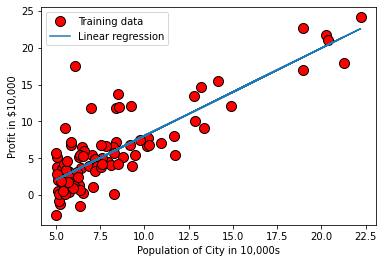

In [14]:
# The original data
plt.plot(x, y, 'ro', ms=10, mec='k') # ro: red circle, ms: markersize, mec: marker edge color, k: black
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')  

# The linear regression
plt.plot(X[:, 1], np.dot(X, theta))
plt.legend(['Training data', 'Linear regression'])
plt.show()

With the linear regression predictor, we predict values for population sizes of 35000 and 70000.

In [15]:
# Predict values for population sizes of 35,000.
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

# Predict values for population sizes of 70,000.
predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 2798.37

For population = 70,000, we predict a profit of 44554.55



### 7. Visualising $J(\theta)$

In this section, we visualize the function $J(\theta_0, \theta_1)$. 

In Appendix, `np.linspace`, `enumerate` and `np.meshgrids` are explained (Section 4, 6, 7).

In [16]:
N=100

theta0_vals = np.linspace(-10, 10, N) # See Section 4 in Appendix for explanation of `np.linspace`.
theta1_vals = np.linspace(-1, 4, N)

J_vals = np.zeros((N, N))


for i, theta0 in enumerate(theta0_vals): # See Section 6 in Appendix for explanation of `enumerate`.
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])    

The following is a graph of $J(\theta_0, \theta_1)$. 

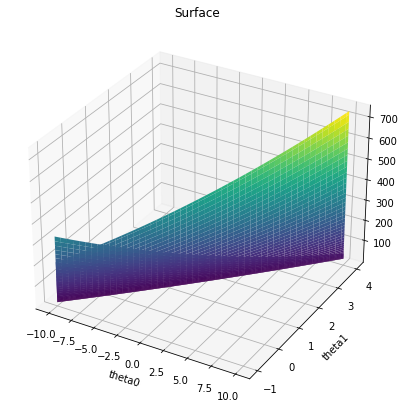

In [17]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals.T, cmap='viridis') 

# See Section 7 in Appendix for the reason why we use the transpose of `J_vals`.

plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')
plt.show()

We plot the countours of $J(\theta_0, \theta_1)$ including the minimum value.

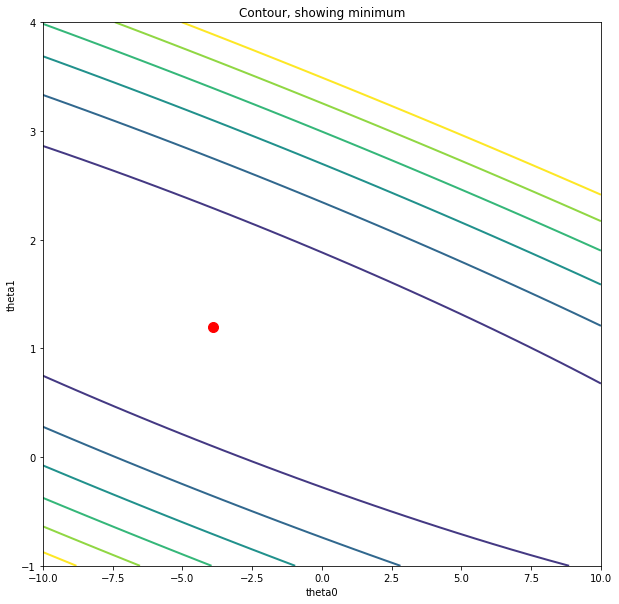

In [22]:
fig = plt.figure(figsize=(7, 7))
plt.contour(theta0_vals, theta1_vals, J_vals.T, linewidths=2, cmap='viridis', levels=np.linspace(4, 300, 7))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10) # ms = markersize
plt.title('Contour, showing minimum')
plt.show()

In the following plot, the level sets are chosen by `np.logspace`. `np.logspace` is explained in Section 5 in Appendix.

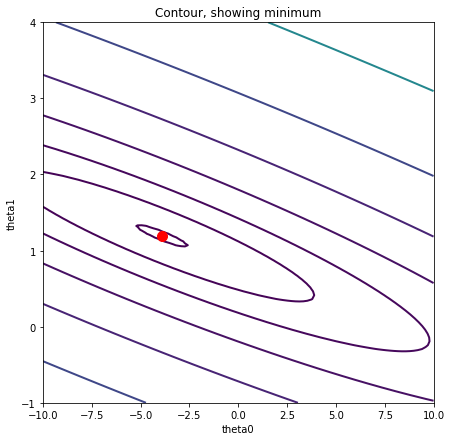

In [19]:
fig = plt.figure(figsize=(7, 7))
plt.contour(theta0_vals, theta1_vals, J_vals.T, linewidths=2, cmap='viridis', levels=np.logspace(0, 3, 10))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10) # ms = markersize
plt.title('Contour, showing minimum')
plt.show()

In [20]:
print(`good`)

SyntaxError: invalid syntax (<ipython-input-20-a4d445ee5b37>, line 1)

In [ ]:
print('good')